<a href="https://colab.research.google.com/github/Paulsob/TelecomLabs/blob/main/Lab5_telecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
from thinkdsp import normalize, unbias, read_wave, PinkNoise, decorate, UncorrelatedGaussianNoise, Spectrum, Wave, Noise
import numpy as np
import matplotlib.pyplot as plt

--2025-05-14 20:14:00--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2025-05-14 20:14:01--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48554 (47K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.42K  --.-KB/s    in 0.05s   

2025-05-14 20:14:02 (917 KB/s) - ‘thinkdsp.py’ saved [48554/48554]



Пункт 1

In [2]:
def serial_corr(wave, lag=1):
    N = len(wave)
    y1 = wave.ys[lag:]
    y2 = wave.ys[:N-lag]
    corr = np.corrcoef(y1, y2)[0, 1]
    return corr
def autocorr(wave):
    lags = np.arange(len(wave.ys)//2)
    corrs = [serial_corr(wave, lag) for lag in lags]
    return lags, corrs

In [3]:
vocal_glissando = read_wave('vocal-glissando.wav')
vocal_glissando.make_audio()

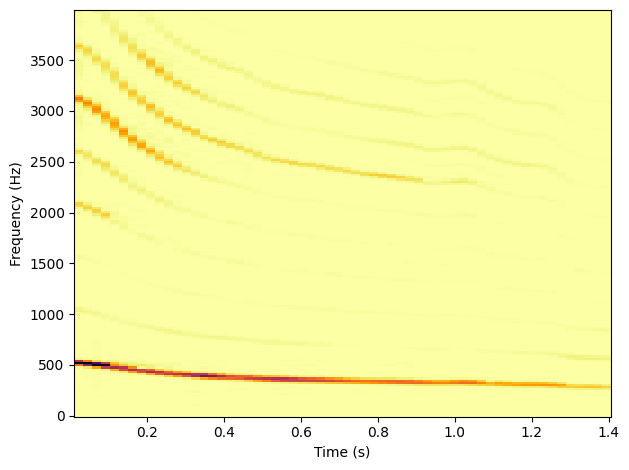

In [4]:
vocal_glissando.make_spectrogram(2048).plot(high=4000)
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

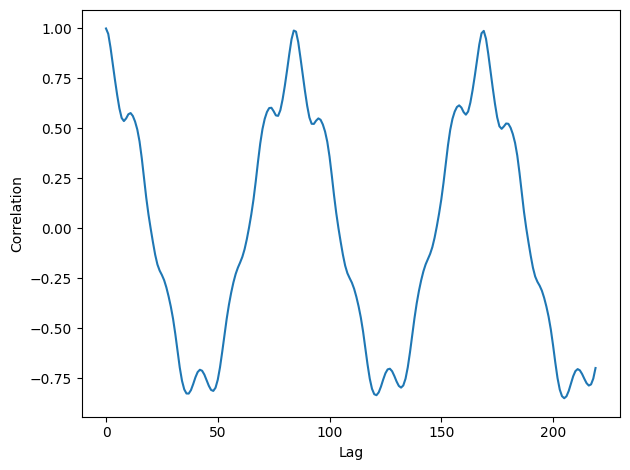

In [5]:
segment1 = vocal_glissando.segment(start=0.0, duration=0.01)
lags1, corrs1 = autocorr(segment1)
plt.plot(lags1, corrs1)
decorate(xlabel='Lag', ylabel='Correlation')

In [6]:
lag1 = lags1[corrs1.index(max(corrs1[50:100]))]
period1 = lag1 / segment1.framerate
frequency1 = 1 / period1
print(f'lag: {lag1}\nfrequency: {frequency1:.2f} Hz')

lag: 84
frequency: 525.00 Hz


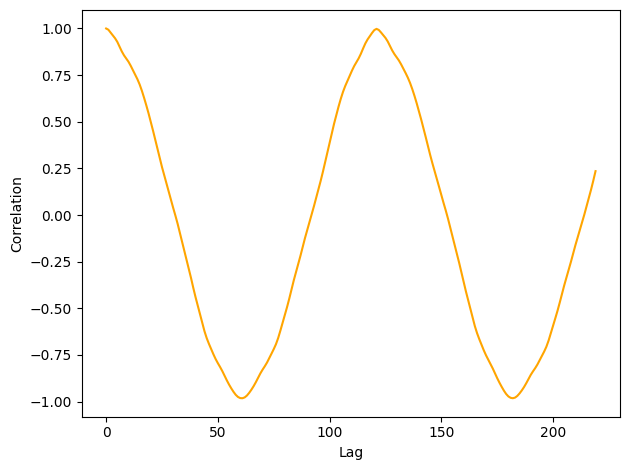

In [7]:
segment2 = vocal_glissando.segment(start=0.5, duration=0.01)
lags2, corrs2 = autocorr(segment2)
plt.plot(lags2, corrs2, color='orange')
decorate(xlabel='Lag', ylabel='Correlation')

In [8]:
lag2 = lags2[corrs2.index(max(corrs2[100:150]))]
period2 = lag2 / segment2.framerate
frequency2 = 1 / period2
print(f'lag: {lag2}\nfrequency: {frequency2:.2f} Hz')

lag: 121
frequency: 364.46 Hz


пункт 2

In [9]:
def estimate_fundamental(segment: Wave, start: int, end: int) -> np.float64:
    lags, corrs = autocorr(segment)
    lag = lags[corrs.index(max(corrs[start:end]))]
    period = lag / segment.framerate
    frequency = 1 / period
    return frequency

In [10]:
wave = read_wave('rhapblue.wav')
wave.make_audio()

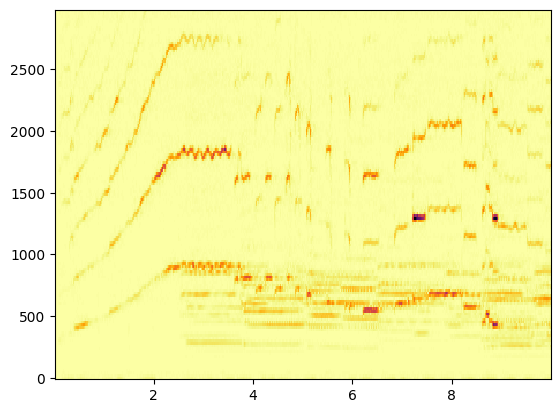

In [11]:
wave.make_spectrogram(512).plot(high=3000)

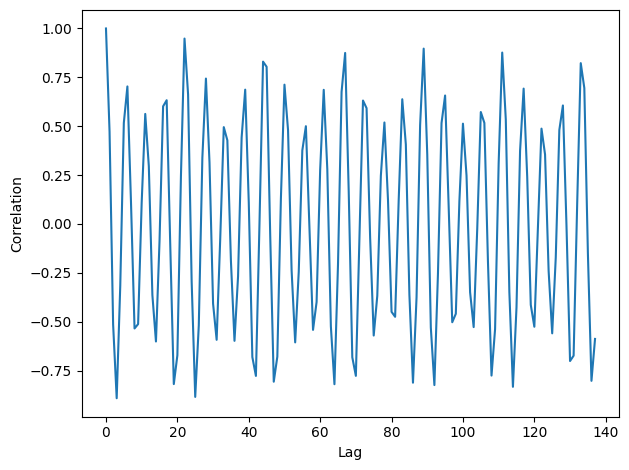

In [12]:
segment1 = wave.segment(start=1, duration=0.025)
lags1, corrs1 = autocorr(segment1)
plt.plot(lags1, corrs1)
decorate(xlabel='Lag', ylabel='Correlation')

In [13]:
estimate_fundamental(segment1, 20, 30)

np.float64(501.1363636363636)

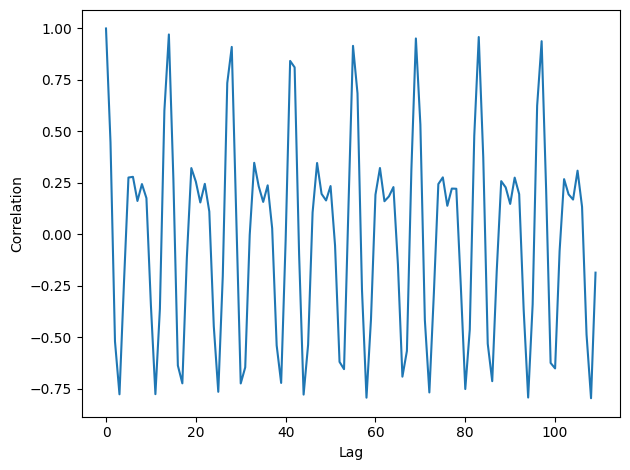

In [14]:
segment2 = wave.segment(start=2, duration=0.02)
lags2, corrs2 = autocorr(segment2)
plt.plot(lags2, corrs2)
decorate(xlabel='Lag', ylabel='Correlation')

In [15]:
estimate_fundamental(segment2, 7, 15)

np.float64(787.5)

Пункт 3

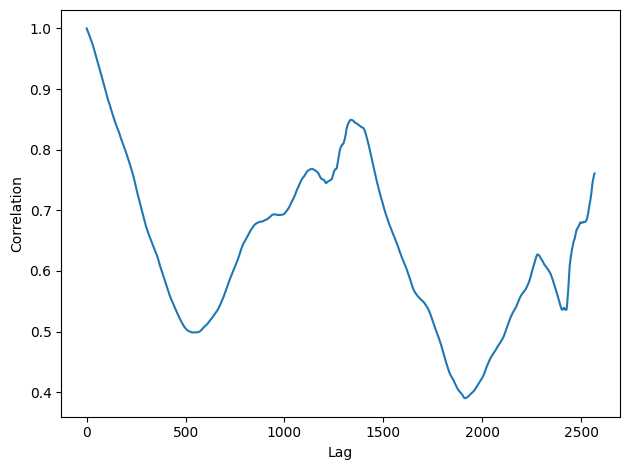

In [17]:
import pandas as pd

df = pd.read_csv('Bitcoin-price-USD.csv')
btc = Wave(
    ys=df['Price'],
    ts=df.index,
    framerate=1,
)
blags, bcorrs = autocorr(btc)
plt.plot(blags, bcorrs)
decorate(xlabel='Lag', ylabel='Correlation')